In [256]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import tqdm
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [139]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Stocks_data/tcs.csv')


In [140]:
df["Date"] = pd.to_datetime(df["Date"])
df.drop(['Date.1'],axis =1,inplace = True)

In [141]:
df.set_index(['Date'],inplace=True)
df.drop(['Symbol','Series'],axis=1,inplace=True)

In [142]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2015-01-01,380.75,381.0,381.05,377.05,379.00,377.70,378.33,321140,1.214976e+13,7645,93391,0.2908
2015-01-02,377.70,378.0,383.50,378.00,379.50,380.95,381.24,960337,3.661218e+13,14605,527004,0.5488
2015-01-05,380.95,379.1,381.60,377.10,379.80,380.00,379.79,842678,3.200426e+13,26590,388593,0.4611
2015-01-06,380.00,377.0,378.45,361.20,369.95,367.90,370.26,1443145,5.343422e+13,32994,756677,0.5243
2015-01-07,367.90,367.9,370.00,360.45,363.90,364.85,363.72,1527500,5.555868e+13,21579,924628,0.6053
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,186.20,187.0,188.40,178.70,180.20,179.95,183.65,20008768,3.674521e+14,114935,3942133,0.1970
2020-10-16,179.95,181.5,182.95,173.50,175.30,175.70,176.63,29518941,5.214072e+14,163941,5645280,0.1912
2020-10-19,175.70,176.7,177.90,173.50,174.20,174.20,174.96,20656092,3.613988e+14,117018,3544485,0.1716


In [ ]:
df['Close'].plot()

In [144]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(df['Close'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                   -0.527289
p-value                           0.886580
#Lags Used                       10.000000
Number of Observations Used    1424.000000
dtype: float64


In [145]:
# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [215]:
open_df = df[['Open']].copy()

In [150]:
close_df = df[[ 'Close']].copy()

In [175]:
#get differenced values
#diff = close_df.diff().rename(index=str, columns={"Closing Price": "Close"})


<Figure size 1224x576 with 0 Axes>

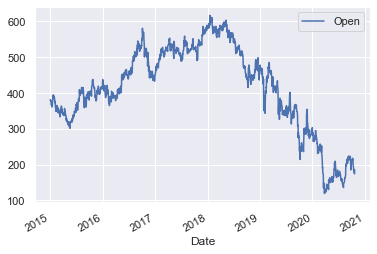

In [217]:
plt.figure(figsize=(17,8))
open_df.plot()

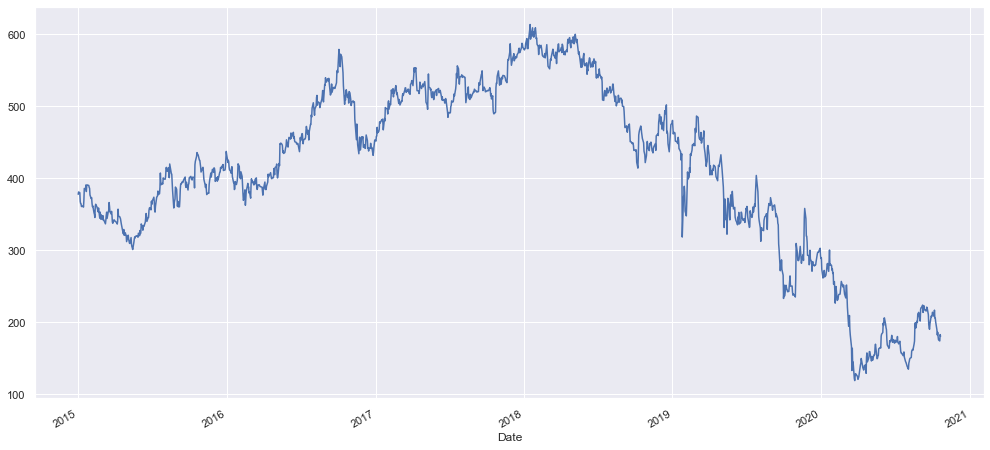

In [184]:
plt.figure(figsize=(17,8))
close_df.plot()

In [219]:
#call .diff off a pandas/numpy series to get differenced values
diff_open = open_df.diff().rename(index=str, columns={"Opening price since 2015": "Open"})


In [154]:
close_df = df.copy()

In [222]:
close_df.head()

Date
2015-01-01    377.70
2015-01-02    380.95
2015-01-05    380.00
2015-01-06    367.90
2015-01-07    364.85
Name: Close, dtype: float64

In [156]:
close_df = df['Close'].copy()

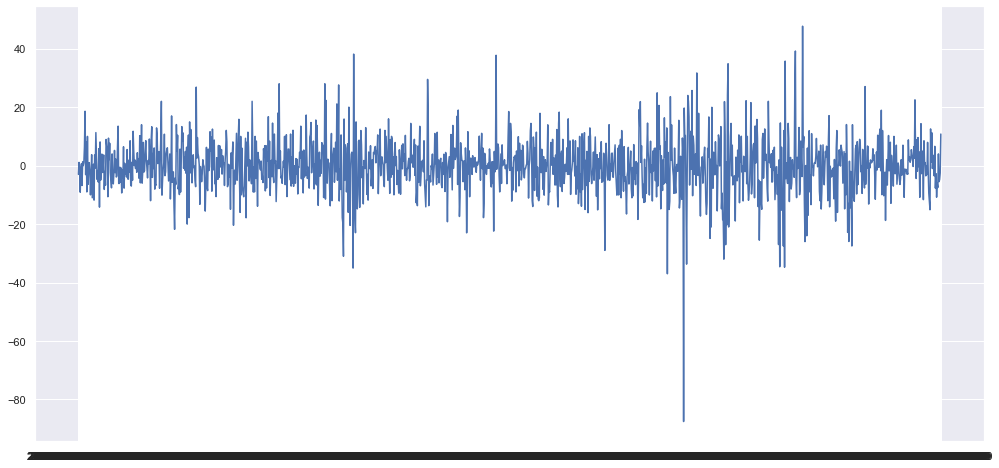

In [223]:
#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(diff_open)

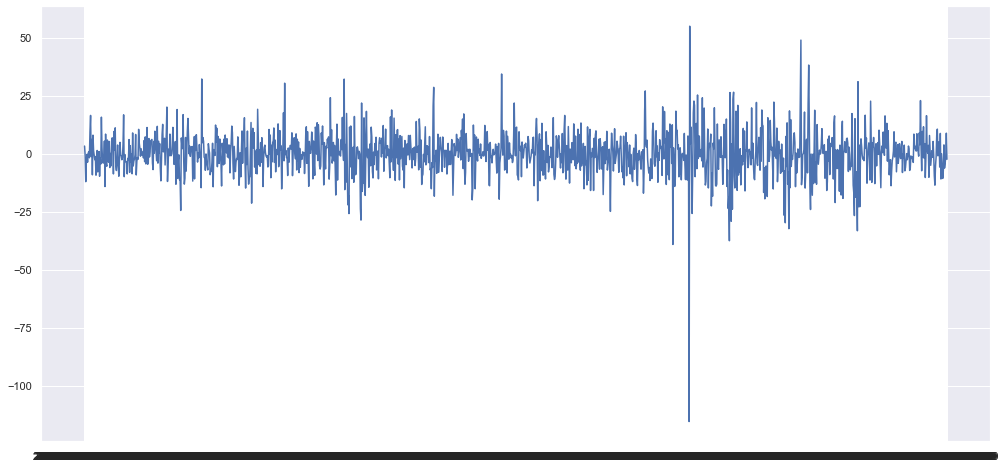

In [214]:
#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(diff)

In [224]:
tcs_open_price_lag_1 = open_df.shift(periods=1)
tcs_open_price_lag_2 = open_df.shift(periods=2)

In [158]:
tcs_price_lag_1 = close_df.shift(periods=1)
tcs_price_lag_2 = close_df.shift(periods=2)

No handles with labels found to put in legend.


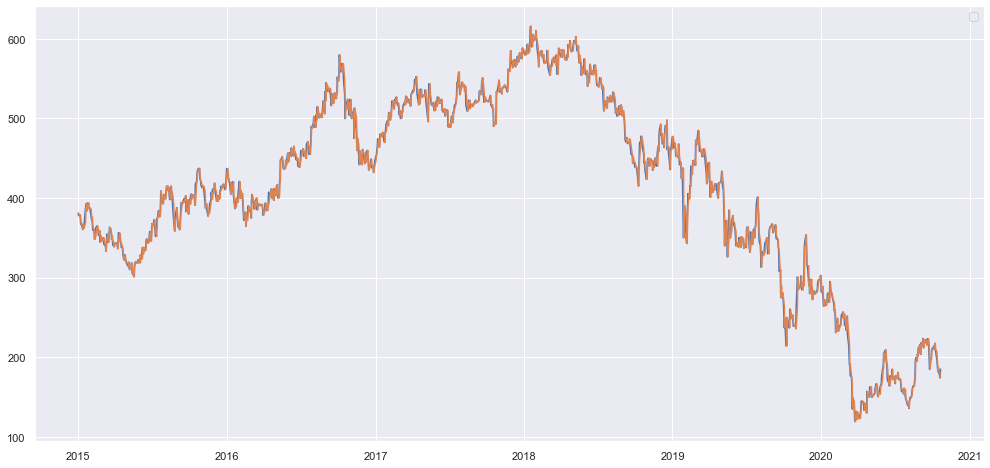

In [225]:
plt.figure(figsize=(17,8))
plt.plot(open_df)
plt.plot(tcs_open_price_lag_1)
plt.legend()

No handles with labels found to put in legend.


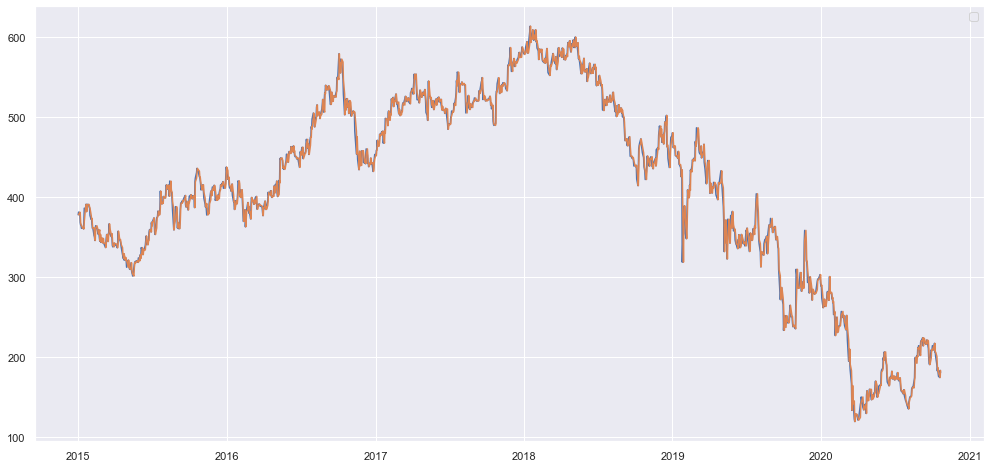

In [186]:
plt.figure(figsize=(17,8))
plt.plot(close_df)
plt.plot(tcs_price_lag_1)
plt.legend()

No handles with labels found to put in legend.


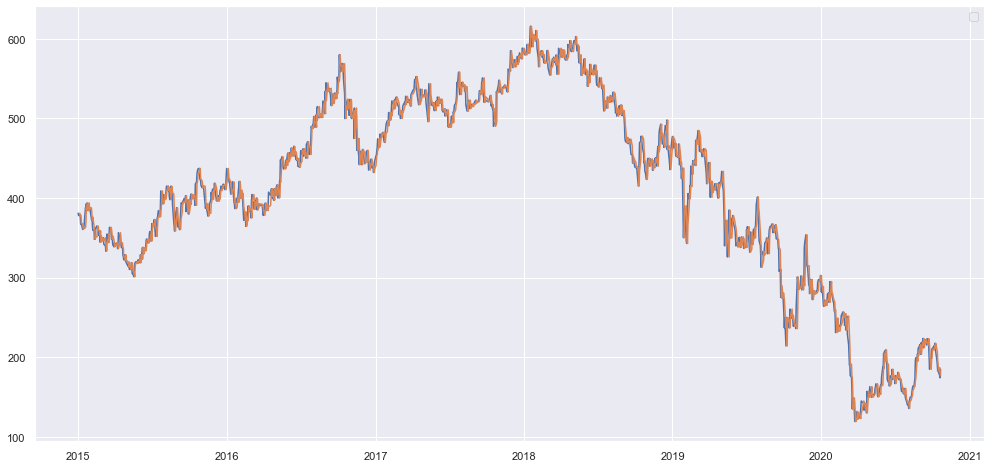

In [226]:
plt.figure(figsize=(17,8))
plt.plot(open_df)
plt.plot(tcs_open_price_lag_2)
plt.legend()

No handles with labels found to put in legend.


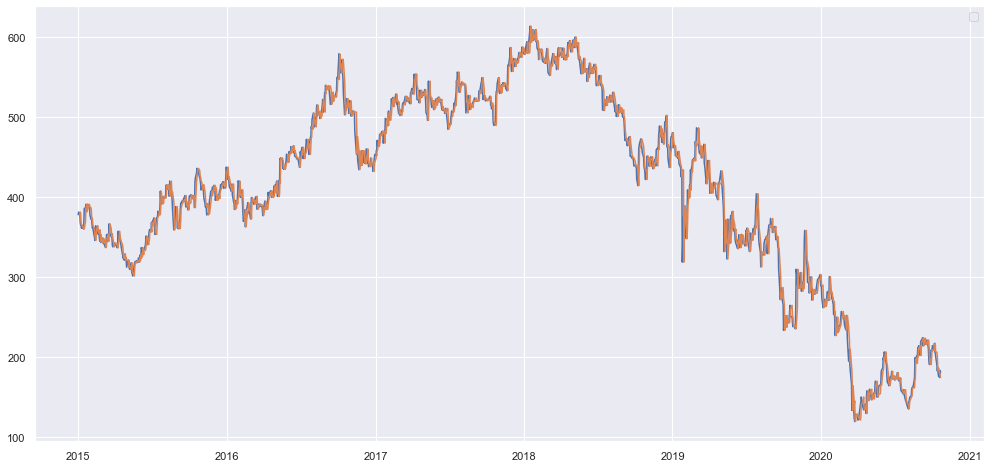

In [187]:
plt.figure(figsize=(17,8))
plt.plot(close_df)
plt.plot(tcs_price_lag_2)
plt.legend()

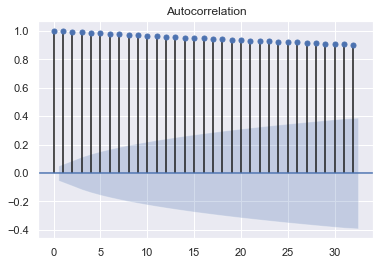

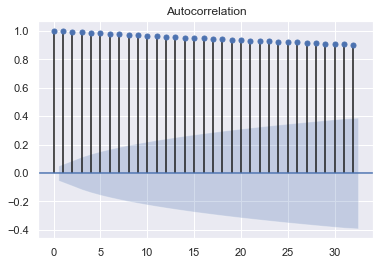

In [227]:
##auto corr for opening 

plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(open_df[:-1], alpha=.05)

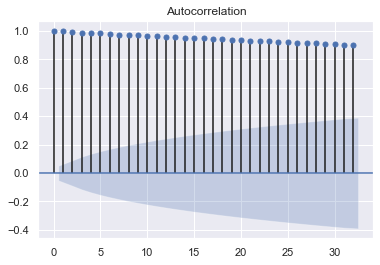

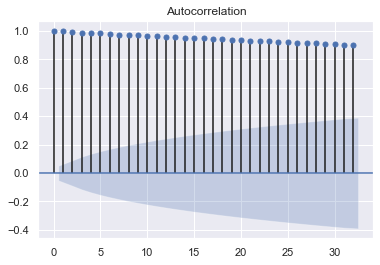

In [162]:
#auto corr for closing 

#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(close_df[:-1], alpha=.05)

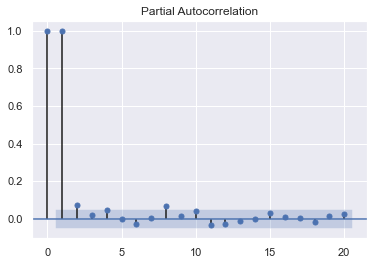

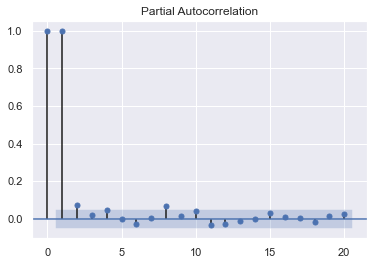

In [228]:
#for opening 

plot_pacf(open_df[:-1], alpha=.05, lags=20)

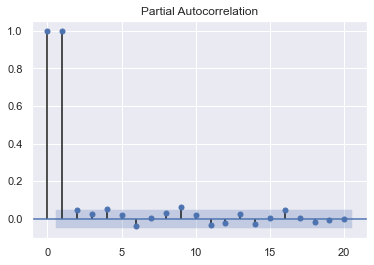

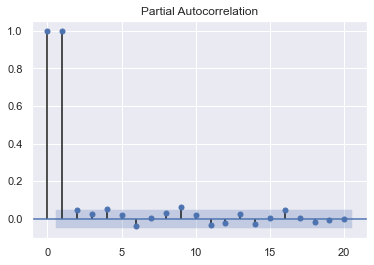

In [164]:
#for closing 

plot_pacf(close_df[:-1], alpha=.05, lags=20)

talk ab MA and AR and Correlation 

AR: Autoregression. A model that uses the dependent relationship between an observation and 
    some number of lagged observations.

MA: Moving Average. A model that uses the dependency between an observation and a residual 
    error from a moving average model applied to lagged observations.

In [340]:
close_df.shape

(1437,)

In [339]:
open_df.shape

(1437, 1)

In [306]:
close_df.Train=close_df[1:1150,] # From 01 Sep 2017 to 31 May 2018
close_df.Test=close_df[1151:1437,] # From 01 Jun 2018 to 30 Jun

In [336]:
#perform dickey fuller to see if our data is stationary

test = adfuller(df['Open'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)


Test Statistic                   -0.510409
p-value                           0.889969
#Lags Used                        7.000000
Number of Observations Used    1427.000000
dtype: float64


In [229]:
#perform dickey fuller to see if our data is stationary

test = adfuller(diff_open['Open'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)


Test Statistic                -1.519716e+01
p-value                        5.898559e-28
#Lags Used                     6.000000e+00
Number of Observations Used    1.428000e+03
dtype: float64


In [209]:
#perform dickey fuller to see if our data is stationary

test = adfuller(diff['Close'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -1.238302e+01
p-value                        4.980118e-23
#Lags Used                     9.000000e+00
Number of Observations Used    1.425000e+03
dtype: float64


negative p value means the sample mean < hyp mean

In [361]:
model = ARIMA(close_df[:-1], order=(3,1,0))
close_model_fit = model.fit(disp=0)
print(close_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1435
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -5271.465
Method:                       css-mle   S.D. of innovations              9.531
Date:                Thu, 22 Oct 2020   AIC                          10552.931
Time:                        19:28:21   BIC                          10579.275
Sample:                             1   HQIC                         10562.767
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1363      0.214     -0.636      0.525      -0.556       0.284
ar.L1.D.Close    -0.0760      0.026     -2.884      0.004      -0.128      -0.024
ar.L2.D.Close    -0.0398      0.026     

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base


In [364]:
model = ARIMA(close_df[:-1], order=(2,2,3))
close_model_fit = model.fit(disp=0)
print(close_model_fit.summary())


/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1434
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -5271.531
Method:                       css-mle   S.D. of innovations              9.532
Date:                Thu, 22 Oct 2020   AIC                          10557.062
Time:                        19:29:45   BIC                          10593.939
Sample:                             2   HQIC                         10570.831
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0008      0.001     -1.264      0.206      -0.002       0.000
ar.L1.D2.Close    -1.3511      0.024    -57.302      0.000      -1.397      -1.305
ar.L2.D2.Close    -0.9673      0.024

In [359]:
model = ARIMA(close_df[:-1], order=(4,2,3))
close_model_fit = model.fit(disp=0)
print(close_model_fit.summary())


/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  """
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/sta

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1434
Model:                 ARIMA(4, 2, 3)   Log Likelihood               -5270.084
Method:                       css-mle   S.D. of innovations              9.521
Date:                Thu, 22 Oct 2020   AIC                          10558.168
Time:                        19:28:17   BIC                          10605.582
Sample:                             2   HQIC                         10575.871
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0008      0.001     -1.503      0.133      -0.002       0.000
ar.L1.D2.Close    -0.9344      0.280     -3.336      0.001      -1.483      -0.385
ar.L2.D2.Close    -0.0341      0.287

In [342]:
model = ARIMA(open_df[:-1], order=(3,1,0))
open_model_fit = model.fit(disp=0)
print(open_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1435
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -5248.254
Method:                       css-mle   S.D. of innovations              9.378
Date:                Thu, 22 Oct 2020   AIC                          10506.509
Time:                        19:16:05   BIC                          10532.853
Sample:                             1   HQIC                         10516.345
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1433      0.214     -0.670      0.503      -0.562       0.276
ar.L1.D.Open    -0.0889      0.026     -3.373      0.001      -0.141      -0.037
ar.L2.D.Open    -0.0224      0.026     -0.84

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base
/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  then falling back to try again with the model row labels as the base


<Figure size 1224x576 with 0 Axes>

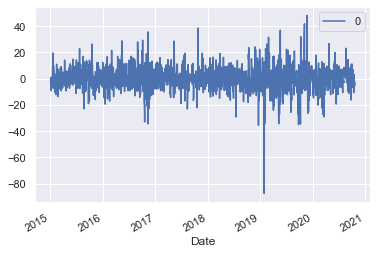

In [365]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(open_model_fit.resid)
residuals.plot()
plt.show()

<Figure size 1224x576 with 0 Axes>

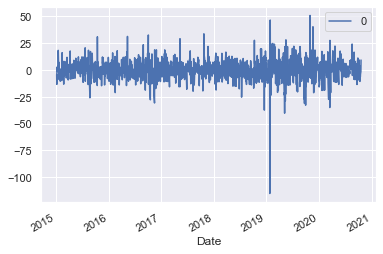

In [191]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(close_model_fit.resid)
residuals.plot()
plt.show()

<Figure size 1224x576 with 0 Axes>

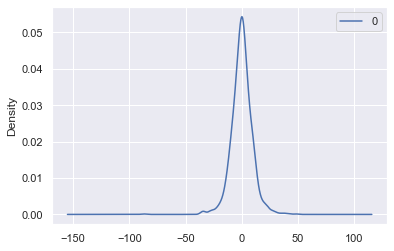

In [366]:
#for open

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(open_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

<Figure size 1224x576 with 0 Axes>

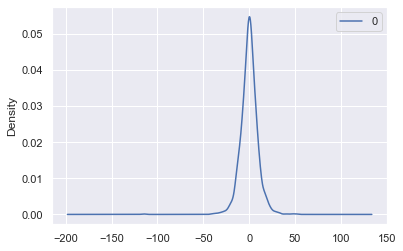

In [192]:
#for close 

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(close_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

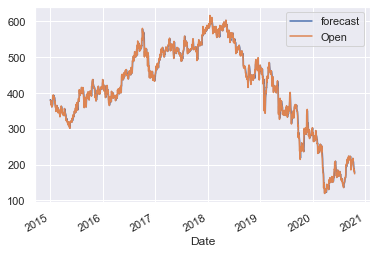

<Figure size 1224x576 with 0 Axes>

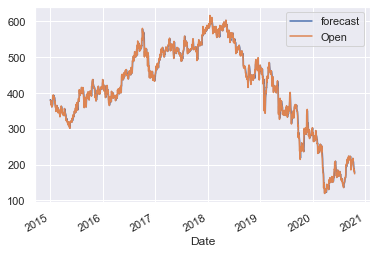

In [367]:
#open predictions 

plt.figure(figsize=(17,8))
open_model_fit.plot_predict()

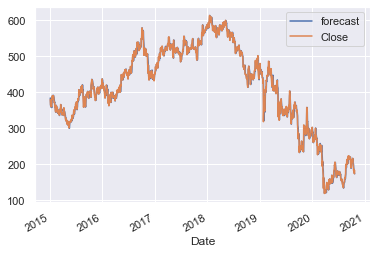

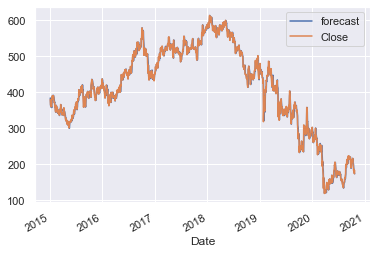

In [380]:
#close predictions 

close_model_fit.plot_predict()

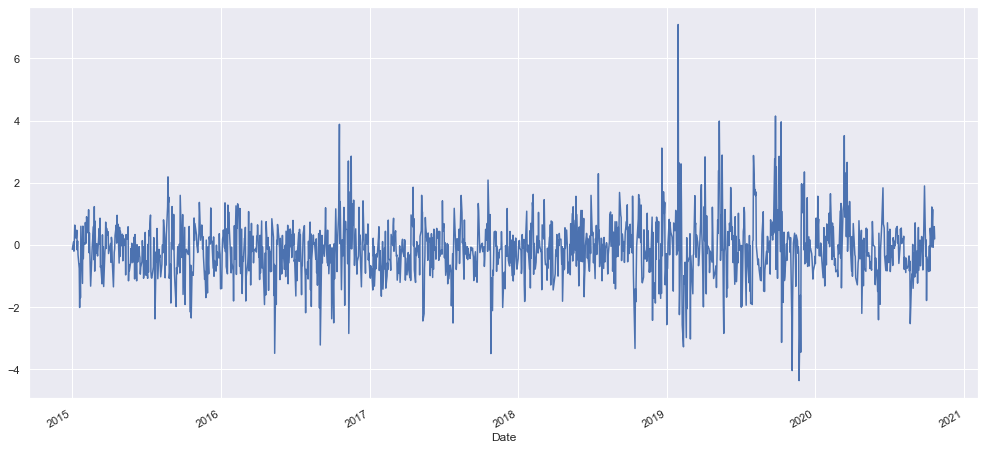

In [382]:
#for open 

plt.figure(figsize=(17,8))
open_model_fit.predict().plot()

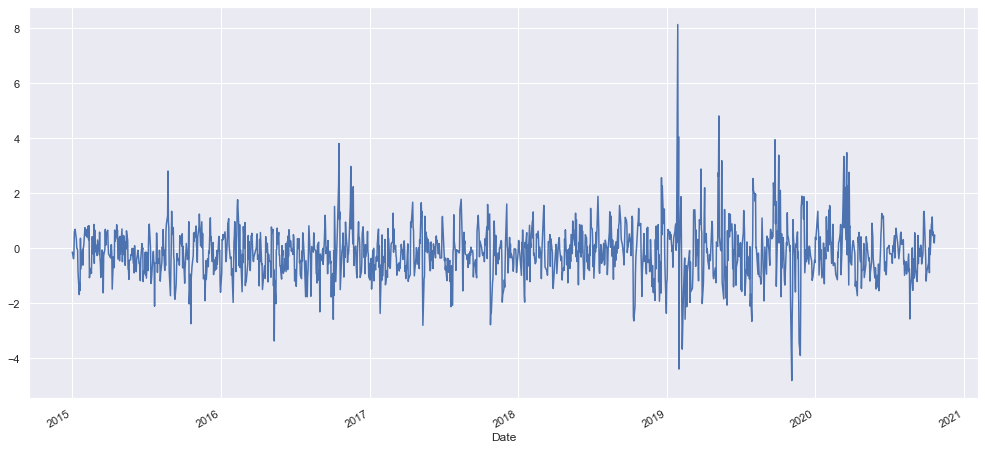

In [323]:
#for close 

plt.figure(figsize=(17,8))
close_model_fit.predict().plot()

In [344]:
open_preds = open_model_fit.predict()

In [346]:
close_preds = model_fit.predict()

In [370]:
open_model_fit.forecast()

(array([174.62429622]),
 array([9.37809183]),
 array([[156.24357399, 193.00501844]]))

In [369]:
close_model_fit.forecast()

(array([181.95897179]),
 array([9.5315606]),
 array([[163.2774563 , 200.64048728]]))

In [354]:
#writing open and closign preds to csv

import csv

record_list = [ list(item) for item in list(zip(open_preds, close_preds))]
#print(record_list)

with open('open_close_preds.csv', "a") as fp:
    writer = csv.writer(fp)
    writer.writerows(record_list)

<Figure size 1224x576 with 0 Axes>

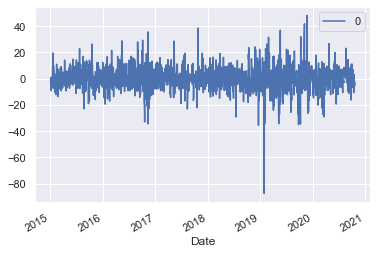

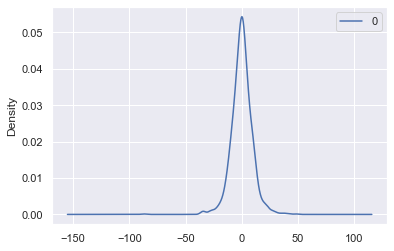

                 0
count  1435.000000
mean     -0.000307
std       9.381365
min     -87.378596
25%      -5.035455
50%       0.054912
75%       4.961994
max      47.948133


In [383]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(open_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

<Figure size 1224x576 with 0 Axes>

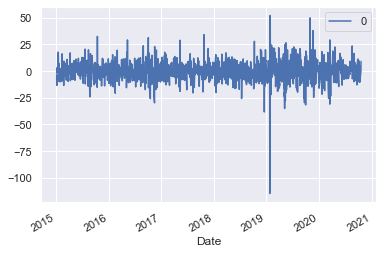

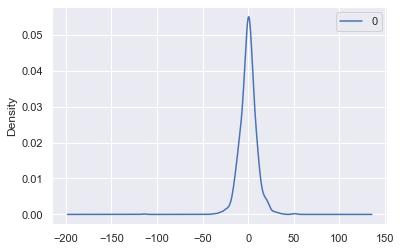

                 0
count  1434.000000
mean      0.093193
std       9.548911
min    -114.750564
25%      -4.791136
50%       0.246428
75%       4.992800
max      52.213617


In [386]:
# plot closing residual errors
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(close_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [329]:
model_fit.predict().to_csv('test_preds.csv')

In [300]:
close_df.to_csv('close_df.csv',index=False)